In [35]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")
plt.rcParams['font.size'] = 13.0
%matplotlib inline

In [4]:
data = pd.read_csv("HR_dataset.csv") # Importing the dataset
data.head()                            # View a subset of data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
print("Number of examples: ", data.shape[0])
print("Number of attributes: ", data.shape[1])

Number of examples:  14999
Number of attributes:  10


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


We have 7 categorical variables, 3 continuous variables and **no null values**.

In [7]:
data.describe() # Basic description of data.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## **Dependent Variable: "left"**

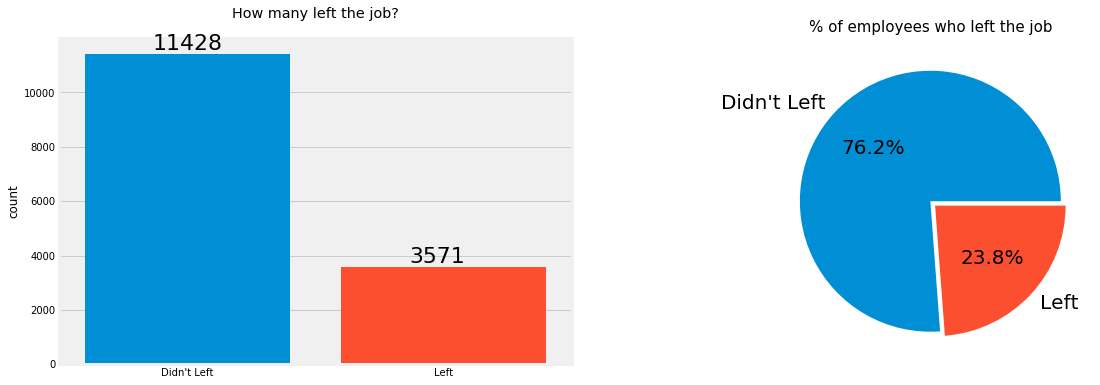

In [8]:
fig, ax = plt.subplots(1,2, figsize=(18,6))

sns.countplot(data["left"], saturation=1, ax=ax[0])
ax[0].set_title("How many left the job?", pad=20)
ax[0].set_xlabel("")
ax[0].set_xticklabels(["Didn't Left", "Left"])
for p in ax[0].patches:
    ax[0].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/3, p.get_height()+1), va="bottom", fontsize=22)

plt.pie(data["left"].value_counts(), labels=["Didn't Left", "Left"], explode=[0,0.05], autopct="%1.1f%%", textprops={"fontsize":20})
plt.title("% of employees who left the job", fontsize=15)
plt.show()

We have a binary classification problem. And the classes are imbalanced.

### Now we will analyze the independent variables and see its relation with dependent variable.

## **Left vs Salary**

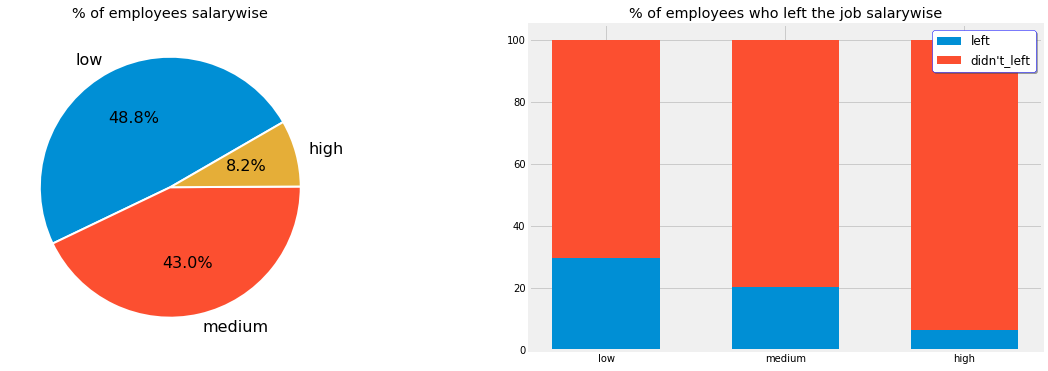

In [9]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(121)
ax.set_title("% of employees salarywise")
prop = plt.pie(data["salary"].value_counts(), labels=data["salary"].unique(), autopct="%1.1f%%", startangle=30,
               wedgeprops={"edgecolor":"white", "linewidth":"2"}, textprops={"fontsize":"16"})


ax = fig.add_subplot(122)

salaries = data["salary"].value_counts()
bar1 = (data[data["left"]==1]["salary"].value_counts()/salaries)*100
bar2 = (data[data["left"]==0]["salary"].value_counts()/salaries)*100
labels = data["salary"].unique()

plt.bar(labels, bar1, label="left", width=0.6)
plt.bar(labels, bar2, bottom=bar1, label="didn't_left", width=0.6)
ax.set_title("% of employees who left the job salarywise")
#ax.set_yticks(ax.get_yticks()*100)

plt.legend(loc="upper right", fontsize=12, title_fontsize=12, facecolor="white", edgecolor="blue", shadow=True)
plt.show()

Salary is an important factor as we see in the barplot, with increasing salary less employees leave their job.

## **Left vs Number of Projects**

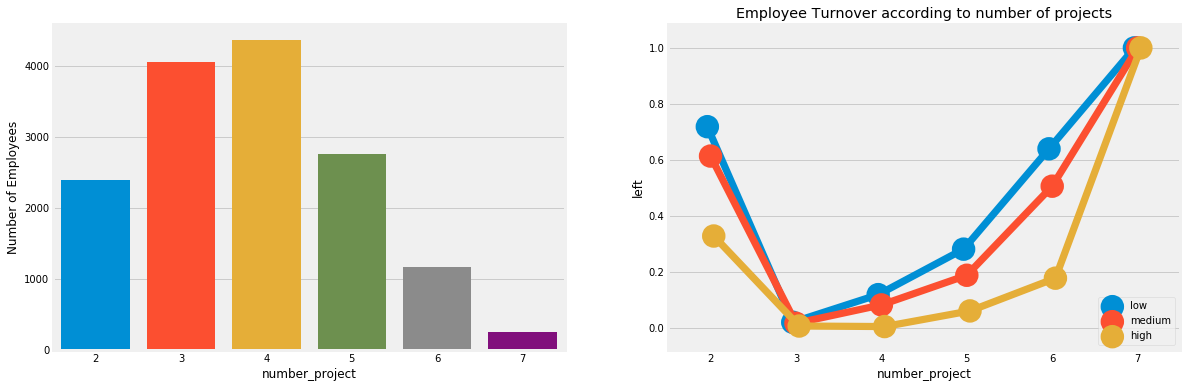

In [10]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(121)
sns.countplot("number_project", data=data, saturation=1, ax=ax)
ax.set_ylabel("Number of Employees")

ax = fig.add_subplot(122)
sns.pointplot(x="number_project", y="left", hue="salary", data=data, pallete=["green", "brown", "purple"], dodge=True, ci=None, ax=ax)
ax.set_title("Employee Turnover according to number of projects")
ax.legend(loc="lower right")

plt.show()

After doing 3 projects the chances of employee turnover increases with increasing number of projects.<br>
They are very likely to leave job after doing 7 projects. And the trend is same across all salary groups.

## **Left vs Accident at workplace**

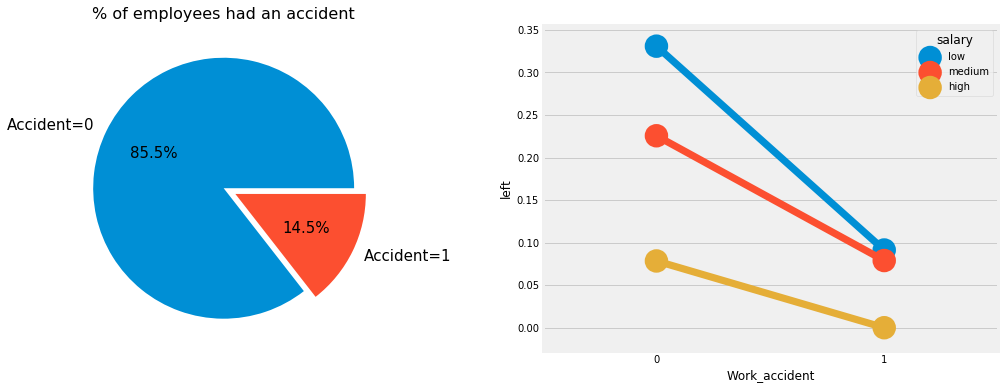

In [11]:
sub = data[["Work_accident", "left"]].groupby("left", as_index=False).sum()

fig = plt.figure(figsize=(16,6))

ax = fig.add_subplot(121)
ax.pie(data["Work_accident"].value_counts(), explode=[0, 0.1], autopct="%1.1f%%", labels=["Accident=0", "Accident=1"], textprops={"fontsize":15})
ax.set_title("% of employees had an accident", fontsize=16)
ax = fig.add_subplot(122)
sns.pointplot(x="Work_accident", y="left", hue="salary", data=data, ci=None, ax=ax)

plt.show()

In [12]:
data[data["Work_accident"]==1].groupby("salary").sum()[["Work_accident", "left"]]

,Work_accident,left
salary,,
high,192,0
low,1040,95
medium,937,74


In [13]:
pd.crosstab(data.salary, [data.Work_accident, data.left], margins=True)

Work_accident     0           1         All
left              0     1     0    1       
salary                                     
high            963    82   192    0   1237
low            4199  2077   945   95   7316
medium         4266  1243   863   74   6446
All            9428  3402  2000  169  14999

14.5% of all employees had an accident at workplace. All high salary people who had an accident left the job.<br>
The chances of turnover also increases among the other two salary groups.

## **Left vs Promotion in last 5 years**

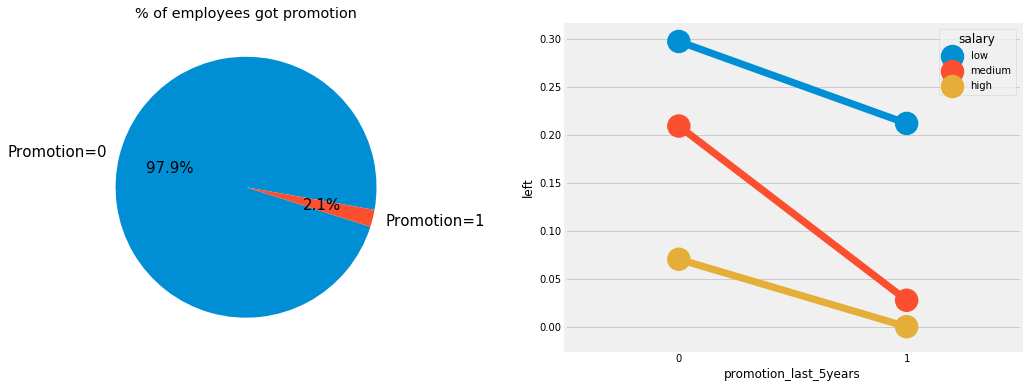

In [14]:
sub = data[["promotion_last_5years", "left"]].groupby("left", as_index=False).sum()

#d = data["promotion_last_5years"].value_counts()/data["promotion_last_5years"].count()*100

fig = plt.figure(figsize=(16,6))

ax = fig.add_subplot(121)
ax.pie(data["promotion_last_5years"].value_counts(), explode=[0, 0], autopct="%1.1f%%", labels=["Promotion=0", "Promotion=1"], startangle=-10, textprops={"fontsize":15})
ax.set_title("% of employees got promotion")

ax = fig.add_subplot(122)
sns.pointplot(x="promotion_last_5years", y="left", hue="salary", data=data, ci=None, ax=ax)

plt.show()

In [15]:
pd.crosstab([data["promotion_last_5years"], data["salary"]], data["left"], margins=True)

left                              0     1    All
promotion_last_5years salary                    
0                     high     1083    82   1165
                      low      5092  2158   7250
                      medium   4953  1312   6265
1                     high       72     0     72
                      low        52    14     66
                      medium    176     5    181
All                           11428  3571  14999

In [16]:
data[data['promotion_last_5years']==1].groupby('salary').sum()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,46.55,49.40,270,14117,395,15,0,72
low,41.37,44.84,227,12603,249,18,14,66
medium,121.35,130.98,700,37032,685,43,5,181


Only 2.1% of the total employees got a promotion in last 5 years. None of the high salary employees who got promotion left the job.<br>
The chances of turnover largely decreases among medium salary employees but 25% of the low salary employees leave the job.

## **Left vs Time spend in company**

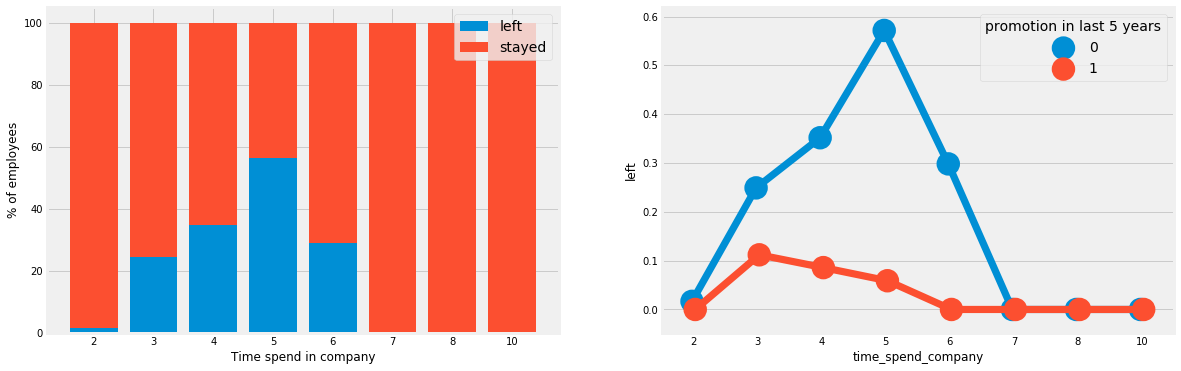

In [17]:
tsc0 = data[data["left"]==0]["time_spend_company"].value_counts()
tsc1 = data[data["left"]==1]["time_spend_company"].value_counts()

df = pd.DataFrame({"tsc0":tsc0, "tsc1":tsc1}).fillna(value=0)
df.index = [str(idx) for idx in df.index]
df["sum"] = df.sum(axis=1)
df = df.div(df["sum"], axis=0)*100

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].bar(df.index, df.tsc1, label="left")
ax[0].bar(df.index, df.tsc0, bottom=df.tsc1, label="stayed")
ax[0].set_xticks(df.index)
ax[0].set_xlabel("Time spend in company")
ax[0].set_ylabel("% of employees")
ax[0].legend(fontsize=14)

sns.pointplot(x="time_spend_company", y="left", hue="promotion_last_5years", data=data, dodge=True, ci=None, ax=ax[1])
ax[1].legend(title="promotion in last 5 years", title_fontsize=14, fontsize=14)

plt.show()

In [18]:
pd.crosstab([data.promotion_last_5years, data.left], [data.time_spend_company], margins=True, margins_name='All').style.background_gradient(cmap='summer_r')

Employees who wants to change their job do it within 5-6 years of working in the same company but a promotion can change their mind.<br>
And after 6 years no employees changes their job irrespective of getting a promotion or not.

## **Left vs Satisfaction level**

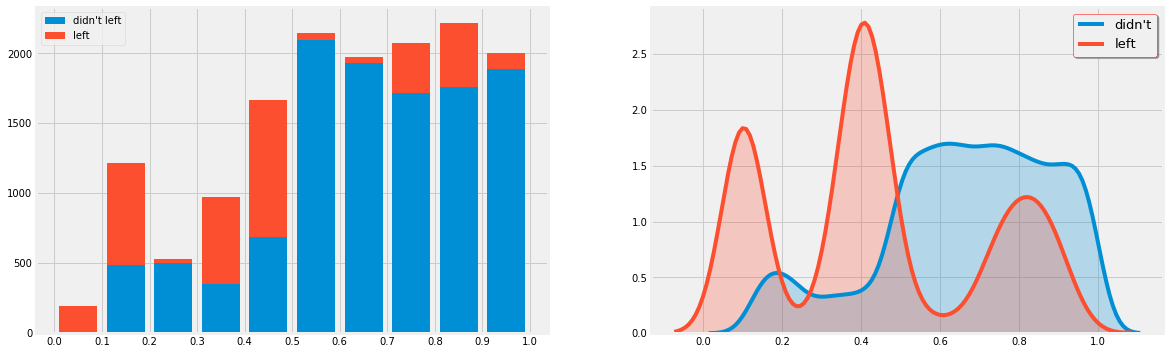

In [19]:
bar1 = data[data["left"]==0]["satisfaction_level"]
bar2 = data[data["left"]==1]["satisfaction_level"]

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(121)
ax.hist([bar1, bar2], bins=np.arange(0,1.1,0.1), rwidth=0.8, stacked=True, label=["didn't left", "left"])
ax.set_xticks(np.arange(0,1.1,0.1))
ax.legend()

ax = fig.add_subplot(122)
sns.kdeplot(bar1, shade=True, label="didn't", ax=ax)
sns.kdeplot(bar2, shade=True, label="left", ax=ax)

plt.legend(fontsize=13, shadow=True, edgecolor="red", fancybox=True)
plt.show()

As we expect, higher satisfaction level decreases the chances of employee turnover but still there are employees who would consider changing their job.<br>
May be due to other factors.

## **Left vs Last evaluation score**

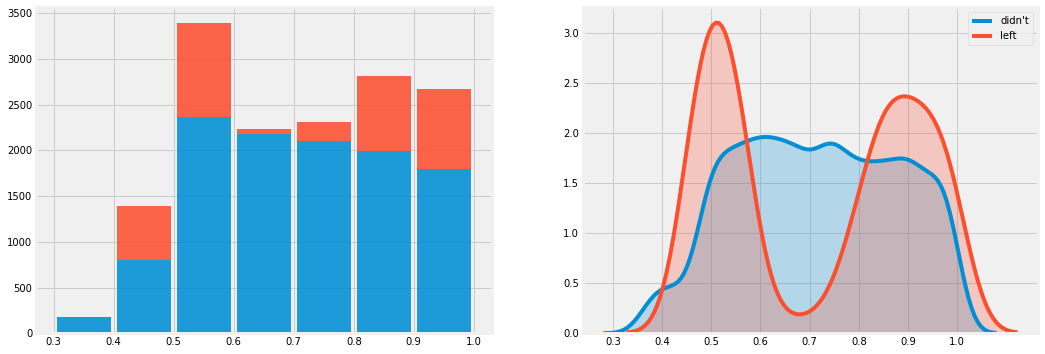

In [20]:
fig = plt.figure(figsize=(16,6))

kde1 = data[data["left"]==0]["last_evaluation"]
kde2 = data[data["left"]==1]["last_evaluation"]

ax = fig.add_subplot(121)
ax.hist([kde1, kde2], bins=np.arange(0.3,1.1,0.1), stacked=True, alpha=0.88, rwidth=0.9)

ax = fig.add_subplot(122)
sns.kdeplot(kde1, shade=True, label="didn't")
sns.kdeplot(kde2, shade=True, label="left")
ax.set_xticks(np.arange(0.3,1.1,0.1))
plt.show()

In [21]:
ax

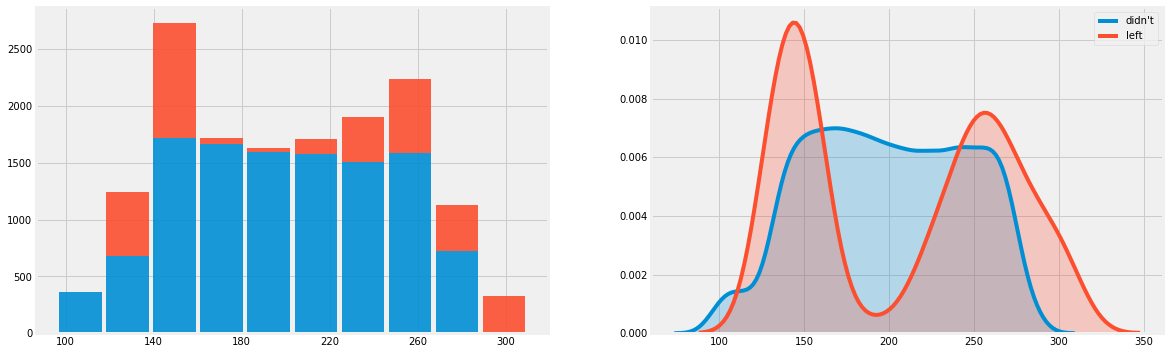

In [22]:
fig, ax = plt.subplots(1,2, figsize=(18,6))

amh0 = data[data["left"]==0]["average_montly_hours"]
amh1 = data[data["left"]==1]["average_montly_hours"]

ax[0].hist([amh0, amh1], stacked=True, rwidth=0.9, alpha=0.9)
ax[0].set_xticks(np.arange(100,301,40))

sns.kdeplot(amh0, shade=True, label="didn't", ax=ax[1])
sns.kdeplot(amh1, shade=True, label="left", ax=ax[1])

plt.show()

In [23]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## **Left vs Department**

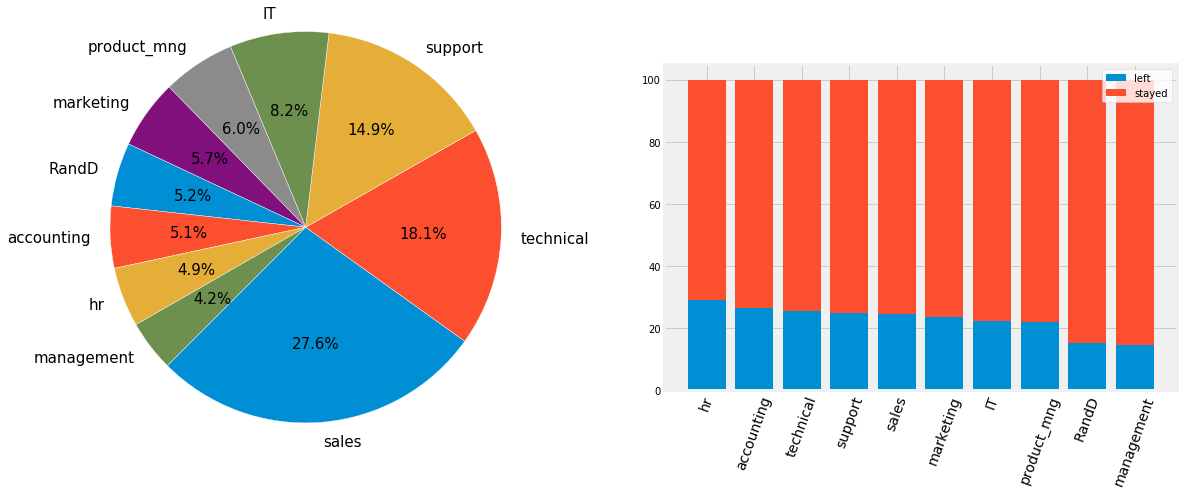

In [24]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(121)
sales_counts = data["sales"].value_counts()
ax.pie(sales_counts, labels=sales_counts.index, autopct="%1.1f%%", radius=1.5, startangle=-135, wedgeprops={"linewidth":0.4, "edgecolor":"white"}, textprops={"fontsize":15})

ax = fig.add_subplot(122)
total = data["sales"].value_counts(sort=False)
didnt_acc_dept = data[data["left"]==0]["sales"].value_counts(sort=False)
left_acc_dept = data[data["left"]==1]["sales"].value_counts(sort=False)
df = pd.DataFrame({"left":left_acc_dept, "stayed":didnt_acc_dept, "total":total}, index=total.index)
df["leftpct"] = (df["left"]/df["total"])*100
df["stayedpct"] = (df["stayed"]/df["total"])*100
df = df.sort_values("leftpct", ascending=False)
x = df.index
plt.bar(x, df["leftpct"], label="left")
plt.bar(x, df["stayedpct"], bottom=df["leftpct"], label="stayed")
plt.xticks(rotation=70, fontsize=14)
plt.legend(facecolor="white")

plt.show()

Sales, Technical and Support are the largest departments.<br>
Employee turnover is highest in HR, accounting and technical department. And lowest in management and R&D department.

In [25]:
# Separating the dependent and independent columns.

y = data["left"]
X = data.drop(columns="left")
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (14999, 9)
Shape of y:  (14999,)


In [26]:
X_temp = X.values # Converting the X data into numpy ndarray.

In [27]:
#Converting the string categorical variables into numerical type

labelencoder_X = LabelEncoder()
X_temp[:,-2] = labelencoder_X.fit_transform(X_temp[:,-2])
X_temp[:,-1] = labelencoder_X.fit_transform(X_temp[:,-1])

#onehotencoder = OneHotEncoder(categorical_features = [-2,-1])
#X_temp = onehotencoder.fit_transform(X_temp).toarray()

In [28]:
# Splitting 25% of the data for training set.

X_train, X_test, y_train, y_test = tts(X_temp, y, test_size=.25, shuffle=True)
print("Number of training example:", X_train.shape[0])
print("Number of test example:", X_test.shape[0])

Number of training example: 11249
Number of test example: 3750


In [36]:
# Creating a list of models to be tried on our data.

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('SVC', SVC()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))

LR = 0.77 (0.02)
KNN = 0.95 (0.01)
SVC = 0.95 (0.01)
DTC = 0.98 (0.00)
RF = 0.99 (0.00)
NB = 0.80 (0.02)


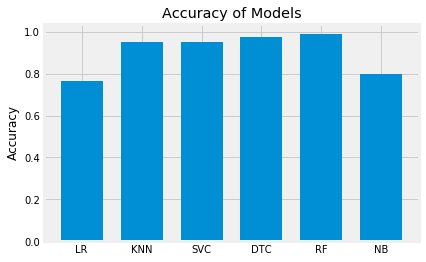

In [37]:
# Training multiple models to find their performance.

results = []
names = []

seed = 7
scoring = 'accuracy'

kfold = KFold(n_splits=10, random_state=seed)

for name, model in models:
    cv_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_result.mean())
    names.append(name)
    msg = "%s = %.2f (%.2f)" %(name, cv_result.mean(), cv_result.std())
    print(msg)
    
plt.bar(x=names, height=results, width=0.7)
plt.title("Accuracy of Models")
plt.ylabel("Accuracy")
plt.show()

Random Forest gives the highest accuracy. So we will use it as our final model.

In [38]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [41]:
labels = ["Stayed", "Left"]

c_report = classification_report(y_test, y_pred, target_names=labels)
print(c_report)

              precision    recall  f1-score   support

      Stayed       0.99      1.00      0.99      2847
        Left       1.00      0.97      0.98       903

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.99      3750
weighted avg       0.99      0.99      0.99      3750



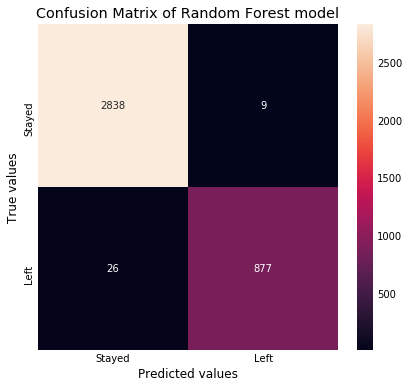

In [33]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix of Random Forest model")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.show()